**Assignment 3:** In this assignment, we will build a fake news detector. The dataset has been provided to use, as we were to build a model for classifying the headlines using The Naive Bayes Classifier /Logistic Regression Classifier /Decesion tree technique in jupyter notebook

# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import itertools
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.linear_model import PassiveAggressiveClassifier
import os

# Input data files are available in the dataset directory ("./data/").

In [27]:
print(os.listdir("./data/"))

['Dataset1']


# Loading the dataset

In [3]:
df_fake = pd.read_csv('./data/Dataset1/Fake.csv')
df_true = pd.read_csv('./data/Dataset1/True.csv')

# Dataset exploration and visualization

In [4]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [10]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
df_fake.tail()

,title,text,subject,date
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016"


In [7]:
df_true.tail()

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [8]:
#adding labels to our data
df_fake['Label'] = 0
df_true['Label'] = 1

In [9]:
df_fake.head()

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [10]:
df_true.head()

,title,text,subject,date,Label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [11]:
# combining datasets
df = pd.concat([df_true,df_fake])

#combining related data
df['Body'] = df['title'] + " " + df['subject']
df = df[['date', 'subject','Body', 'Label']]

# df=df.drop(["date","title","subject"],axis=1)

In [12]:
df.head()

,date,subject,Body,Label
0,"December 31, 2017",politicsNews,"As U.S. budget fight looms, Republicans flip t...",1
1,"December 29, 2017",politicsNews,U.S. military to accept transgender recruits o...,1
2,"December 31, 2017",politicsNews,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,"December 30, 2017",politicsNews,FBI Russia probe helped by Australian diplomat...,1
4,"December 29, 2017",politicsNews,Trump wants Postal Service to charge 'much mor...,1


In [13]:
df.tail()

,date,subject,Body,Label
23476,"January 16, 2016",Middle-east,McPain: John McCain Furious That Iran Treated ...,0
23477,"January 16, 2016",Middle-east,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,0
23478,"January 15, 2016",Middle-east,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,0
23479,"January 14, 2016",Middle-east,How to Blow $700 Million: Al Jazeera America F...,0
23480,"January 12, 2016",Middle-east,10 U.S. Navy Sailors Held by Iranian Military ...,0


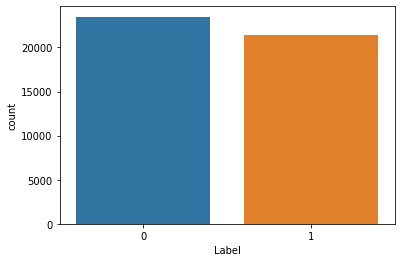

In [14]:
import seaborn as sns
sns.countplot(x="Label", data=df);
plt.show()

In [15]:
df.shape

(44898, 4)

# Data Cleaning and Preprocessing

#### checking for missing values in body data

In [17]:
df['Body'].isnull().count() == df.shape[0]

True

#### confirming replacement of missing values using record #4006 Body column that had a NaN value at line 35 above

In [18]:
df.tail()

,date,subject,Body,Label
23476,"January 16, 2016",Middle-east,McPain: John McCain Furious That Iran Treated ...,0
23477,"January 16, 2016",Middle-east,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,0
23478,"January 15, 2016",Middle-east,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,0
23479,"January 14, 2016",Middle-east,How to Blow $700 Million: Al Jazeera America F...,0
23480,"January 12, 2016",Middle-east,10 U.S. Navy Sailors Held by Iranian Military ...,0


#### defining labels

In [19]:
y = df.Label
X = df.Body

In [20]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Label, dtype: int64

In [21]:
X.head()

0    As U.S. budget fight looms, Republicans flip t...
1    U.S. military to accept transgender recruits o...
2    Senior U.S. Republican senator: 'Let Mr. Muell...
3    FBI Russia probe helped by Australian diplomat...
4    Trump wants Postal Service to charge 'much mor...
Name: Body, dtype: object

# Building a Machine Learning Model

## train_test separation

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

## Applying TF-iDF to the data set

In [23]:
tfidf_vect = TfidfVectorizer(stop_words = 'english')
tfidf_train = tfidf_vect.fit_transform(X_train)
tfidf_test = tfidf_vect.transform(X_test)
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vect.get_feature_names_out())

## Applying Naive Bayes

### Training, Predicting and Evaluating Model

In [24]:
nbmodel = MultinomialNB() 
nbmodel.fit(tfidf_train, y_train)                      # Fit Naive Bayes classifier model according to X, y
pred = nbmodel.predict(tfidf_test)                     # Perform classification on an array of test vectors X.
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
print(cm)

accuracy:   0.977
[[4681  105]
 [ 101 4093]]


## Saving & Loading the Derived Model

In [25]:
import pickle
# save the model
with open('saved_nbmodel.pkl', 'wb') as fcl:
    pickle.dump(nbmodel, fcl)
    
# load saved model
with open('saved_nbmodel.pkl', 'rb') as fcl:
    loaded_nbmodel = pickle.load(fcl)  

testing the saved model

In [26]:
pred = loaded_nbmodel.predict(tfidf_test)# Perform classification on an array of test vectors X using the saved Naive Bayes Model.
score = metrics.accuracy_score(y_test, pred)
print("accuracy from loaded model:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)

accuracy from loaded model:   0.977
